In [162]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [163]:
Traindf=pd.read_excel('food_Train.xlsx')

In [164]:
Testdf=pd.read_excel('food_Test.xlsx')

In [165]:
Traindf.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [166]:
Testdf.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [167]:
Traindf["DATA"] = "train"
Testdf["DATA"] = "test"
Testdf["COST"]=0

In [168]:
df=pd.concat([Traindf,Testdf])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [169]:
df.head()

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [170]:
df.shape

(16921, 10)

In [171]:
df.reset_index(drop=True,inplace=True)

In [172]:
df

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes
...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,0,"North Indian, Mughlai, Chinese",test,Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes
16917,Bangalore,0,"Biryani, North Indian, Sandwich, Salad, Wraps",test,HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes
16918,Faridabad,0,"Continental, North Indian",test,Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes
16919,Kochi,0,"Rolls, Beverages",test,Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN


In [173]:
df.dtypes

CITY             object
COST              int64
CUISINES         object
DATA             object
LOCALITY         object
RATING           object
RESTAURANT_ID     int64
TIME             object
TITLE            object
VOTES            object
dtype: object

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.3+ MB


In [175]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Chennai                       2855
Bangalore                     2835
Hyderabad                     2458
Mumbai                        2311
New Delhi                     1754
                              ... 
Mumbai Dombivali East            1
chennai                          1
Hyderabad neerus emporium.       1
Sathya Nagar                     1
Avadi                            1
Name: CITY, Length: 450, dtype: int64

North Indian                                        716
North Indian, Chinese                               714
South Indian                                        706
Fast Food                                           364
Chinese                                             226
                                                   ... 
North Indian, Chinese, Street Food, South Indian      1
Italian, Desserts, Pizza                              1
Chinese, Mughlai, North Indian, Seafood, Biryani      1
Kerala, Biryani, Chinese                              1
Kebab, BBQ, Nort

In [176]:
df.isnull().sum()

CITY              147
COST                0
CUISINES            0
DATA                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [177]:
df.loc[df["VOTES"].isnull()]

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
13,Kochi,400,South Indian,train,Edappally,-,4319,11am – 11:30pm (Mon-Sun),CASUAL DINING,NaN
62,Kochi,200,"North Indian, Beverages",train,Kalamassery,NEW,7841,11am – 11pm (Mon-Sun),QUICK BITES,NaN
69,New Delhi,200,"Pizza, Fast Food",train,Kalkaji,NEW,11096,11am – 11pm (Mon-Sun),None,NaN
85,Bangalore,300,"North Indian, South Indian",train,Vijay Nagar,-,12657,"Closed (Mon),7:30am – 10:30pm (Tue-Sun)",QUICK BITES,NaN
111,Mumbai,800,"Gujarati, Rajasthani, North Indian",train,Borivali West,NEW,7095,"11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,NaN
...,...,...,...,...,...,...,...,...,...,...
16873,Noida,0,"Cafe, North Indian",test,Sector 63,NEW,7007,11am – 11pm (Mon-Sun),CAFÉ,NaN
16875,New Delhi,0,Fast Food,test,Shalimar Bagh,NEW,6387,12:30pm – 10:30pm (Mon-Sun),QUICK BITES,NaN
16888,Bangalore,0,Continental,test,Indiranagar,NEW,13381,11am – 12midnight (Mon-Sun),QUICK BITES,NaN
16913,Mumbai,0,"Sindhi, Street Food",test,Lower Parel,NEW,6887,"11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",CASUAL DINING,NaN


In [178]:
df["VOTES"].fillna(0,inplace=True)

In [179]:
df.isnull().sum()

CITY             147
COST               0
CUISINES           0
DATA               0
LOCALITY         128
RATING             4
RESTAURANT_ID      0
TIME               0
TITLE              0
VOTES              0
dtype: int64

In [180]:
df["RATING"].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
2.0       2
Name: RATING, dtype: int64

In [181]:
df["RATING"].replace("NEW",0,inplace=True)
df["RATING"].replace("-",0,inplace=True)
df["RATING"].fillna(0,inplace=True)

In [182]:
df.isnull().sum()

CITY             147
COST               0
CUISINES           0
DATA               0
LOCALITY         128
RATING             0
RESTAURANT_ID      0
TIME               0
TITLE              0
VOTES              0
dtype: int64

In [183]:
df["RATING"]=df["RATING"].astype(float)

In [184]:
df["VOTES"].loc[df["VOTES"].str[-5:]=="votes"]=df["VOTES"].loc[df["VOTES"].str[-5:]=="votes"].str.rstrip("votes")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [185]:
df["VOTES"]=df["VOTES"].astype(int)

In [186]:
df.dtypes

CITY              object
COST               int64
CUISINES          object
DATA              object
LOCALITY          object
RATING           float64
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES              int32
dtype: object

In [187]:
df.loc[df["CITY"].isnull()]

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
129,NaN,500,"North Indian, South Indian, Chinese, Continental",train,NaN,3.6,9101,"12noon – 3pm, 7pm – 2am (Mon-Sun)",None,728
246,NaN,300,Biryani,train,Palarivattom Kochi,3.4,14502,12noon – 11pm (Mon-Sun),QUICK BITES,82
411,NaN,600,"North Indian, Chinese, Pizza, Burger, Fast Food",train,NaN,4.0,6313,7pm – 4am (Mon-Sun),None,29
466,NaN,200,North Indian,train,NaN,4.2,1133,4pm – 9pm (Mon-Sun),None,55
481,NaN,250,Street Food,train,NaN,3.7,4788,"11am – 11pm (Mon),9:30am – 12midnight (Tue-Sun)",None,616
...,...,...,...,...,...,...,...,...,...,...
16311,NaN,0,"Continental, Mexican, American",test,Maharashtra 400013,4.0,9779,5pm – 1:30am (Mon-Sun),"PUB,CASUAL DINING",1142
16313,NaN,0,"North Indian, South Indian, Chinese, Biryani",test,NaN,3.5,5922,6am – 11:30pm (Mon-Sun),CASUAL DINING,102
16803,NaN,0,"Fast Food, Italian, Pizza, Sandwich",test,NaN,3.7,4748,1pm – 8am (Mon-Sun),None,27
16815,NaN,0,"Chinese, North Indian",test,NaN,3.5,8587,"11:45am – 3:30pm, 7:30pm – 11:40pm (Mon, Sat)...",QUICK BITES,25


In [188]:
import numpy as np
import math
#math.isnan(df_food["CITY"].iloc[129])
null_city_indexes=df.loc[df["CITY"].isnull()].index
for index in null_city_indexes :
    try:
        if math.isnan(df["CITY"].iloc[index]) and math.isnan(df["LOCALITY"].iloc[index]):
            df["CITY"].iloc[index]="missing"
            df["LOCALITY"].iloc[index]="missing"
    except:
        pass

In [189]:
df.isnull().sum()

CITY             20
COST              0
CUISINES          0
DATA              0
LOCALITY          1
RATING            0
RESTAURANT_ID     0
TIME              0
TITLE             0
VOTES             0
dtype: int64

In [190]:
df.loc[df["CITY"].isnull()]

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
246,NaN,300,Biryani,train,Palarivattom Kochi,3.4,14502,12noon – 11pm (Mon-Sun),QUICK BITES,82
817,NaN,1200,"Thai, Chinese, Continental, North Indian, Italian",train,shop 7 shikrupa socity,4.1,1042,12noon – 12midnight (Mon-Sun),CASUAL DINING,486
5149,NaN,400,"Beverages, Ice Cream, Desserts",train,Navi Mumbai,3.8,7264,11am – 11pm (Mon-Sun),"BEVERAGE SHOP,DESSERT PARLOR",163
5297,NaN,1000,Continental,train,Kochi,3.4,1030,24 Hours (Mon-Sun),CASUAL DINING,19
6397,NaN,950,"Cafe, American, Asian, Bakery, Biryani, Chines...",train,Alibaug,4.2,7334,9am – 9:30pm (Mon-Sun),CAFÉ,253
6451,NaN,400,Bakery,train,Chennai,3.5,2595,10am – 10pm (Mon-Sun),BAKERY,10
8456,NaN,150,"Fast Food, Beverages",train,Mathikere,3.7,12367,9:30am – 11pm (Mon-Sun),QUICK BITES,28
8735,NaN,400,"Chinese, Burger",train,Chennai,3.8,15526,11am – 11pm (Mon-Sun),CASUAL DINING,284
9121,NaN,1500,"Finger Food, American, Continental, Burger, Pizza",train,Bangalore,3.9,9800,11am – 1am (Mon-Sun),"PUB,CASUAL DINING",557
9268,NaN,200,Lebanese,train,Kochi,3.4,12021,11am – 11pm (Mon-Sun),QUICK BITES,14


In [191]:
city_list=df["CITY"].drop_duplicates().to_list()

In [192]:
null_city_indexes=df.loc[df["CITY"].isnull()].index

In [193]:
for index in null_city_indexes:
    for city in city_list:
        if city in df["LOCALITY"].iloc[index].split():
            df["CITY"].iloc[index]=city

In [194]:
df.loc[df["CITY"].isnull()]

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
817,NaN,1200,"Thai, Chinese, Continental, North Indian, Italian",train,shop 7 shikrupa socity,4.1,1042,12noon – 12midnight (Mon-Sun),CASUAL DINING,486
6397,NaN,950,"Cafe, American, Asian, Bakery, Biryani, Chines...",train,Alibaug,4.2,7334,9am – 9:30pm (Mon-Sun),CAFÉ,253
8456,NaN,150,"Fast Food, Beverages",train,Mathikere,3.7,12367,9:30am – 11pm (Mon-Sun),QUICK BITES,28
12314,NaN,650,"North Indian, Bengali",train,Opposite to corporation bank and LIC office ba...,4.3,11724,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,775
14044,NaN,0,"North Indian, Chinese, Mughlai",test,Jaipuria Sunrise Plaza,3.9,14152,"11:30am – 4pm, 5pm – 11pm (Mon-Sun)",QUICK BITES,362


In [195]:
df["CITY"].fillna("missing",inplace=True)
df["LOCALITY"].fillna("missing",inplace=True)

In [196]:
df.isnull().sum()

CITY             0
COST             0
CUISINES         0
DATA             0
LOCALITY         0
RATING           0
RESTAURANT_ID    0
TIME             0
TITLE            0
VOTES            0
dtype: int64

In [197]:
df

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165
...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,0,"North Indian, Mughlai, Chinese",test,Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287
16917,Bangalore,0,"Biryani, North Indian, Sandwich, Salad, Wraps",test,HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469
16918,Faridabad,0,"Continental, North Indian",test,Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53
16919,Kochi,0,"Rolls, Beverages",test,Kochi,0.0,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,0


In [198]:
df.drop(columns=["RESTAURANT_ID","TIME"],inplace=True)

In [199]:
max_cuisines=-1
for i in range(len(df["CUISINES"])):
    temp=len(df["CUISINES"].iloc[i].split(","))
    if temp>max_cuisines:
        max_cuisines=temp
print("Max number of cuisines serverd are :{}".format(max_cuisines))

Max number of cuisines serverd are :8


In [200]:
c1=list()
c2=list()
c3=list()
c4=list()
c5=list()
c6=list()
c7=list()
c8=list()
for i in range(len(df["CUISINES"])):
    temp=df["CUISINES"].iloc[i].split(",")
    try :
        c1.append(temp[0].strip().upper())
    except :
        c1.append('NONE')
    try :
        c2.append(temp[1].strip().upper())
    except :
        c2.append('NONE')
    try :
        c3.append(temp[2].strip().upper())
    except :
        c3.append('NONE')
    try :
        c4.append(temp[3].strip().upper())
    except :
        c4.append('NONE')
    try :
        c5.append(temp[4].strip().upper())
    except :
        c5.append('NONE')
    try :
        c6.append(temp[5].strip().upper())
    except :
        c6.append('NONE')
    try :
        c7.append(temp[6].strip().upper())
    except :
        c7.append('NONE')
    try :
        c8.append(temp[7].strip().upper())
    except :
        c8.append('NONE')

In [201]:
df["c1"]=c1
df["c2"]=c2
df["c3"]=c3
df["c4"]=c4
df["c5"]=c5
df["c6"]=c6
df["c7"]=c7
df["c8"]=c8

In [202]:
max_titles=-1
for i in range(len(df["TITLE"])):
    temp=len(df["TITLE"].iloc[i].split(","))
    if temp>max_titles:
        max_titles=temp
print("Max number of titles are :{}".format(max_titles))

Max number of titles are :2


In [203]:
t1=list()
t2=list()
for i in range(len(df["TITLE"])):
    temp=df["TITLE"].iloc[i].split(",")
    try :
        t1.append(temp[0].strip().upper())
    except :
        t1.append('NONE')
    try :
        t2.append(temp[1].strip().upper())
    except :
        t2.append('NONE')

In [204]:
df["t1"]=t1
df["t2"]=t2

In [205]:
df

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,TITLE,VOTES,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,CASUAL DINING,49,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,"CASUAL DINING,BAR",30,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,BAR
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,CASUAL DINING,221,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,QUICK BITES,24,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
4,Mumbai,300,Desserts,train,Lower Parel,3.8,DESSERT PARLOR,165,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,DESSERT PARLOR,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,0,"North Indian, Mughlai, Chinese",test,Punjabi Bagh,3.9,CASUAL DINING,287,NORTH INDIAN,MUGHLAI,CHINESE,NONE,NONE,NONE,NONE,NONE,CASUAL DINING,NONE
16917,Bangalore,0,"Biryani, North Indian, Sandwich, Salad, Wraps",test,HSR Layout,4.3,None,469,BIRYANI,NORTH INDIAN,SANDWICH,SALAD,WRAPS,NONE,NONE,NONE,NONE,NONE
16918,Faridabad,0,"Continental, North Indian",test,Sector 86,3.7,QUICK BITES,53,CONTINENTAL,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE
16919,Kochi,0,"Rolls, Beverages",test,Kochi,0.0,QUICK BITES,0,ROLLS,BEVERAGES,NONE,NONE,NONE,NONE,NONE,NONE,QUICK BITES,NONE


In [206]:
df.drop(columns=["CUISINES","TITLE"],inplace=True)

In [207]:

from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

In [208]:
df

,CITY,COST,DATA,LOCALITY,RATING,VOTES,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
0,400,1200,1,328,3.6,49,61,32,72,64,62,50,41,18,5,16
1,75,1500,1,1214,4.2,30,6,62,45,64,62,50,41,18,5,1
2,75,800,1,1272,3.8,221,74,23,14,34,62,50,41,18,5,16
3,277,800,1,161,4.1,24,102,23,70,64,62,50,41,18,23,16
4,277,300,1,709,3.8,165,30,67,70,64,62,50,41,18,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,316,0,0,1184,3.9,287,74,64,23,64,62,50,41,18,5,16
16917,42,0,0,461,4.3,469,15,69,83,73,83,50,41,18,20,16
16918,128,0,0,1370,3.7,53,29,69,70,64,62,50,41,18,23,16
16919,216,0,0,642,0.0,0,84,12,70,64,62,50,41,18,23,16


In [209]:
df.dtypes

CITY          int32
COST          int64
DATA          int32
LOCALITY      int32
RATING      float64
VOTES         int32
c1            int32
c2            int32
c3            int32
c4            int32
c5            int32
c6            int32
c7            int32
c8            int32
t1            int32
t2            int32
dtype: object

In [210]:
df_train=df.loc[df["DATA"]==1]
df_test=df.loc[df["DATA"]==0]

In [211]:
df_test.reset_index(drop=True,inplace=True)

In [212]:
df_train.drop(columns=["DATA"],inplace=True)
df_test.drop(columns=["DATA"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


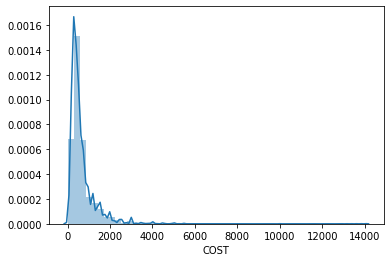

In [213]:
sns.distplot(df_train['COST'])

In [214]:
from scipy.stats import boxcox
df_train['COST']=boxcox(df_train['COST'],0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [215]:
df_test.drop(['COST'],axis=1,inplace=True)

In [216]:
x=df_train.drop(['COST'],axis=1)
x.head()

,CITY,LOCALITY,RATING,VOTES,c1,c2,c3,c4,c5,c6,c7,c8,t1,t2
0,400,328,3.6,49,61,32,72,64,62,50,41,18,5,16
1,75,1214,4.2,30,6,62,45,64,62,50,41,18,5,1
2,75,1272,3.8,221,74,23,14,34,62,50,41,18,5,16
3,277,161,4.1,24,102,23,70,64,62,50,41,18,23,16
4,277,709,3.8,165,30,67,70,64,62,50,41,18,9,16


In [217]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [218]:
y=df_train['COST']
y.head()

0    7.090077
1    7.313220
2    6.684612
3    6.684612
4    5.703782
Name: COST, dtype: float64

In [219]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [221]:
print(x_train.shape,x_test.shape)

(8883, 14) (3807, 14)


In [222]:
print(y_train.shape,y_test.shape)

(8883,) (3807,)


In [223]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [224]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.3296753719789707
Mean_Squared_Error = 0.35593423791777296
Cross_Val_Score =  0.3142201707036825


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -3.5179274142871364e-05
Mean_Squared_Error = 0.5310065370516848
Cross_Val_Score =  -0.000917289212167427


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.32967246249046334
Mean_Squared_Error = 0.35593578282084126
Cross_Val_Score =  0.31422165188619927


******

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2_score =  0.6638283034276722
Mean_Squared_Error = 0.17850308884256375
Cross_Val_Score =  0.6805420897357044


********************************* GradientBoostingRegressor *********************************

 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=97, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2_score =  0.6792333700251192
Mean_Squared_Error = 0.1703231855386636
Cross_Val_Score =  0.6823461763850844




In [225]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.329675,0.356,0.314220
1,Lasso,-0.000035,0.531,-0.000917
2,Ridge,0.329672,0.356,0.314222
3,ElasticNet,-0.000035,0.531,-0.000917
4,DecisionTreeRegressor,0.405391,0.316,0.429516
5,KNeighborsRegressor,0.424631,0.306,0.440292
6,AdaBoostRegressor,0.497299,0.267,0.477186
7,RandomForestRegressor,0.663828,0.179,0.680542
8,GradientBoostingRegressor,0.679233,0.170,0.682346


In [226]:
from sklearn.model_selection import GridSearchCV
parameterGBR={
            'n_estimators':[100,200,300], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,3], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=parameterGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [227]:
gridGBR.best_score_ , gridGBR.best_params_

(0.7262047150398585,
 {'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 300})

In [228]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
  loss='ls',
  max_depth= 4,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 300)
GBR.fit(x_train,y_train)
score=cross_val_score(GBR,x,y,cv=10,scoring='r2').mean()

In [229]:
score

0.734802876377198

In [230]:
from sklearn.externals import joblib
joblib.dump(GBR,"Food_cost.csv")

['Food_cost.csv']

In [231]:
model=joblib.load("Food_cost.csv")
model.predict(df_test)

array([5.5023702 , 5.5023702 , 5.5023702 , ..., 5.5023702 , 5.87689777,
       5.5023702 ])